In [237]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [238]:
from sklearn import datasets
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time
import gzip

from tsne import *

## Basic digits

In [239]:
X, y = datasets.load_digits(return_X_y=True)

In [241]:
st = time()
res = tsne(X2, T=400, l=200, perp=60)
int(time() - st)

Sigmas: [ 224.15974032  229.93160099  160.64207928   32.27574282  168.86575962
   48.74833126  146.6678617    62.11160594   41.1527962    43.02269982
  106.77318576  134.93841154  146.06653389   73.07734539   34.19016626
   65.33527534  107.37613238  135.59207207  354.80551691   34.34280347
   28.78171069   51.65967043   76.52649681  438.38648446  291.01828506
  133.44539442   54.7026101   134.36447629  133.50850099  129.19762386
  151.50972802   84.16603558  131.32149539  171.49303065  126.83273388
  121.47716599   40.3095721    31.5488637    58.89429026   37.22337268
   41.56226394   28.99197053  149.57490566   69.47278554   39.95469455
  140.82224978   92.60172721   41.72393019   25.22073116   33.03197477
   21.86716831   32.13466424   20.7632358   137.02326967   86.96076144
   22.44110229  268.11197924   76.0430933    28.87053065   76.50912801
   40.59710674   77.31014042   70.11108639   55.64509118   73.95305313
   61.01555116   49.05884711   25.89109821   54.09874471   27.0294116

11

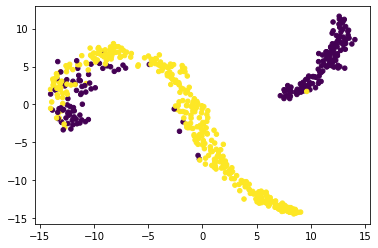

In [242]:
plt.scatter(res[:, 0], res[:, 1], s=20, c=y2)
plt.show()

## Scalability testing

In [182]:
X2, y2 = datasets.load_breast_cancer(return_X_y=True)

In [175]:
def scale(a, b, num_rows):
    a, b = shuffle_and_cut_data(a,b)
    tmp_a, tmp_b = a, b
    for _ in range(num_rows // len(a) - 1):
        a = np.concatenate((a,tmp_a))
        b = np.concatenate((b,tmp_b))
    return a, b

def shuffle_and_cut_data(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    a, b = a[p], b[p]
    return a[:100], b[:100]

In [166]:
print(y.shape)
a, b = scale(X, y, 10000)
print(a.shape, b.shape)
print(X.shape, y.shape)

(1797,)
(10000, 64) (10000,)
(1797, 64) (1797,)


In [152]:
tmpa, tmpb = shuffle_and_cut_data(X, y)

In [223]:
def test_scalability(X, y, rows, T=400):
    timings = []
    for r in rows:
#         d, l = scale(X[:r], y[:r], r)
        st = time()
        tsne(X[:r], T=T, l=200)
        timings.append(int(time() - st))
        print(f'{r} rows took {int(time() - st)} secs.')
    return timings

In [224]:
image_size = 784
num_images = 60000

f = gzip.open('data/train-images-idx3-ubyte.gz','r')
f.read(16)
buf = f.read(image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size)

f = gzip.open('data/train-labels-idx1-ubyte.gz','r')
magic_number = int.from_bytes(f.read(4), 'big')
label_count = int.from_bytes(f.read(4), 'big')
label_data = f.read()
lbl = np.frombuffer(label_data, dtype=np.uint8)

In [233]:
rows = [100, 1000, 5000]
test_scalability(data/255*16, lbl, rows)

Exceeded max iterations, returning 1.000000788860905e-20 with value [100.]
100 rows took 0 secs.


KeyboardInterrupt: 

## Shapes

In [91]:
def plot2d(data, labels, perp=30, iters=400):
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.title('Original')
    plt.axis('square')
    plt.show()
    
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    res = tsne(data, T=iters, l=200, perp=perp)
    plt.scatter(res[:, 0], res[:, 1], s=20, c=labels)
    plt.title(f'Perplexity: {perp}')
    plt.axis('square')
    plt.show()

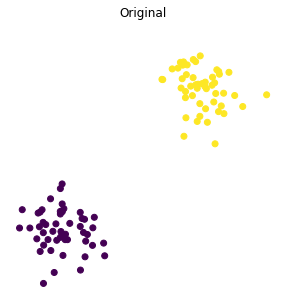

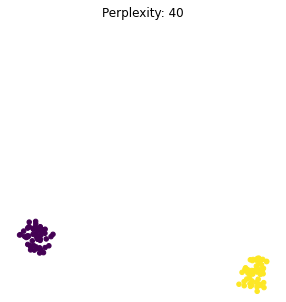

In [92]:
size = 50
d1 = np.random.multivariate_normal([-5, -5], 2*np.eye(2), size=size)
d2 = np.random.multivariate_normal([5, 5], 2*np.eye(2), size=size)
d = np.concatenate((d1, d2), axis=0)
l = [0] * size + [1] * size
plot2d(d, l, perp=40)

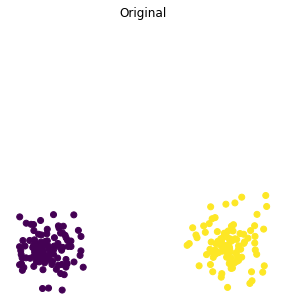

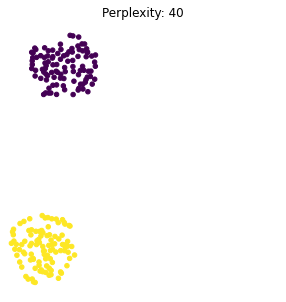

In [93]:
size = 100
d1 = np.random.multivariate_normal([-8, 0], [[2,0],[0,2]], size=size)
d2 = np.random.multivariate_normal([8, 0], [[2,0],[0,2]], size=size)
d = np.concatenate((d1, d2), axis=0)
l = [0] * size + [1] * size
plot2d(d, l, perp=40)

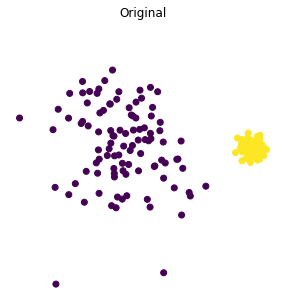

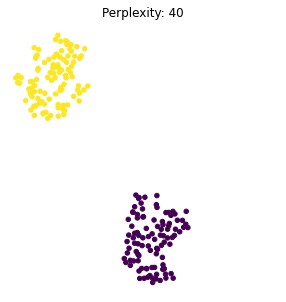

In [246]:
size = 100
d1 = np.random.multivariate_normal([-8, 0], [[20,0],[0,20]], size=size)
d2 = np.random.multivariate_normal([8, 0], [[0.5,0],[0,0.5]], size=size)
d = np.concatenate((d1, d2), axis=0)
l = [0] * size + [1] * size
plot2d(d, l, perp=40)

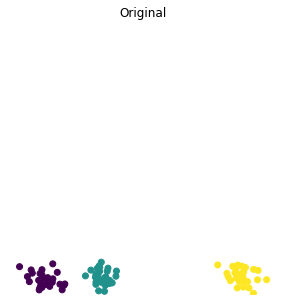

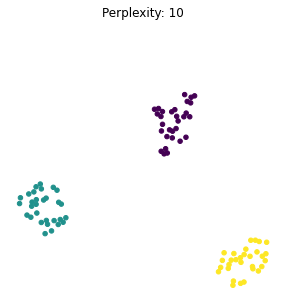

In [94]:
size = 30
d1 = np.random.multivariate_normal([-5, 0], [[2,0],[0,2]], size=size)
d2 = np.random.multivariate_normal([5, 0], [[2,0],[0,2]], size=size)
d3 = np.random.multivariate_normal([30, 0], [[2,0],[0,2]], size=size)
d = np.concatenate((d1, d2, d3), axis=0)
l = [0] * size + [1] * size + [2] * size
plot2d(d, l, perp=10)

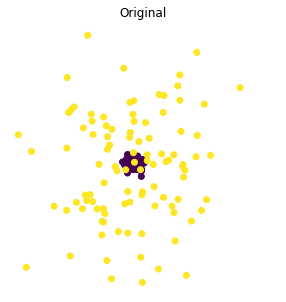

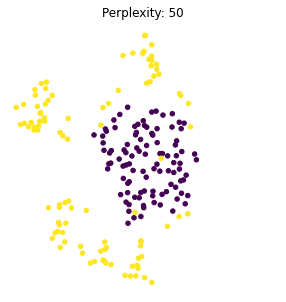

In [98]:
size = 100
d1 = np.random.multivariate_normal([0, 0], [[0.5,0],[0,0.5]], size=size)
d2 = np.random.multivariate_normal([0, 0], [[80,0],[0,80]], size=size)
d = np.concatenate((d1, d2), axis=0)
l = [0] * size + [1] * size
plot2d(d, l, perp=50)

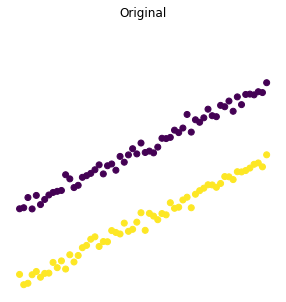

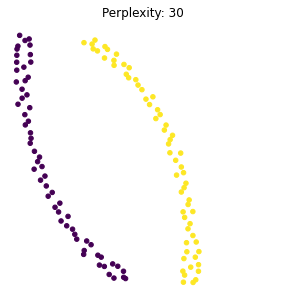

In [97]:
size = 60
xt = np.linspace(0,100,size)
d1 = xt * 0.5 + 30 + np.random.normal(0,2,size=size)
d2 = xt * 0.5 + 1 + np.random.normal(0,2,size=size)
d = np.concatenate((d1.reshape([-1,1]), d2.reshape([-1,1])), axis=0)
tmp = np.concatenate((xt.reshape([-1,1]),xt.reshape([-1,1])), axis=0)
d = np.concatenate((tmp, d), axis=1)
l = [0] * size + [1] * size
plot2d(d, l, perp=30)

## Hyper tuning

Exceeded max iterations, returning 1.000000788860905e-20 with value [1797.]


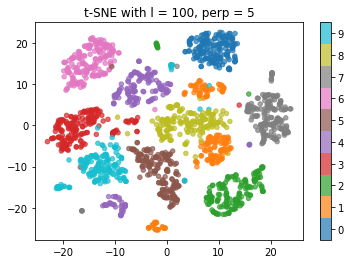

Exceeded max iterations, returning 1.000000788860905e-20 with value [1797.]


KeyboardInterrupt: 

In [244]:
l = np.array([100,250,400,800,1200])
perps = np.array([5,10,20,30,40,50,60])

hyperparam_combination = np.array(np.meshgrid(l,perps)).T.reshape(-1,2)

for i in hyperparam_combination:
    l = i[0]
    perp = i[1]

    res = tsne(X, l=l, perp=perp, verbose=False)
    plt.scatter(res[:, 0], res[:, 1], s=20, c=y, cmap=plt.cm.tab10, vmin=-0.5, vmax=9.5, alpha=0.7)
    plt.title("t-SNE with l = "+str(l)+", perp = "+str(perp))
    plt.colorbar(ticks=range(10))

    plt.show()